In [53]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
from  matplotlib import cm
from pylab import *
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader

import netCDF4 as nc

from cartopy.feature import NaturalEarthFeature

In [160]:
#data and figure path 
path= "C:\\Users\\JAMES\\Desktop\\GMet\\Flood\\RAINFALL DATA\\RR without some stations\\INTEPORLATION_OND\\DATA_NetCDF\\"
path


fig_path="C:\\Users\\JAMES\\Desktop\\GMet\\Flood\\RAINFALL DATA\\RESULTS"

In [179]:
#read and open netcdf files
df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12=xr.open_dataset(path+'stn_interp_2005-10_2005-12.nc'),\
xr.open_dataset(path+'stn_interp_2006-10_2006-12.nc'),\
xr.open_dataset(path+'stn_interp_2007-10_2007-12.nc'),\
xr.open_dataset(path+'stn_interp_2008-10_2008-12.nc'),\
xr.open_dataset(path+'stn_interp_2009-10_2009-12.nc'),\
xr.open_dataset(path+'stn_interp_2010-10_2010-12.nc'),\
xr.open_dataset(path+'stn_interp_2011-10_2011-12.nc'),\
xr.open_dataset(path+'stn_interp_2012-10_2012-12.nc'),\
xr.open_dataset(path+'stn_interp_2013-10_2013-12.nc'),\
xr.open_dataset(path+'stn_interp_2014-10_2014-12.nc'),\
xr.open_dataset(path+'stn_interp_2015-10_2015-12.nc'),\
xr.open_dataset(path+'stn_interp_2016-10_2016-12.nc'),

In [180]:
#list of files and corresponding title 
cdtfiles=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

#Each plot title 
titles=["OND_2005","OND_2006","OND_2007",
        "OND_2008","OND_2009","OND_2010","OND_2011","OND_2012","OND_2013","OND_2014","OND_2015","OND_2016"]
cdtTitles=[]

In [181]:
#loop through the files, extract the rainfall variable and save in vrble as list
vrble=[]
for l in cdtfiles:
    vrble.append(list(l.keys())[0])

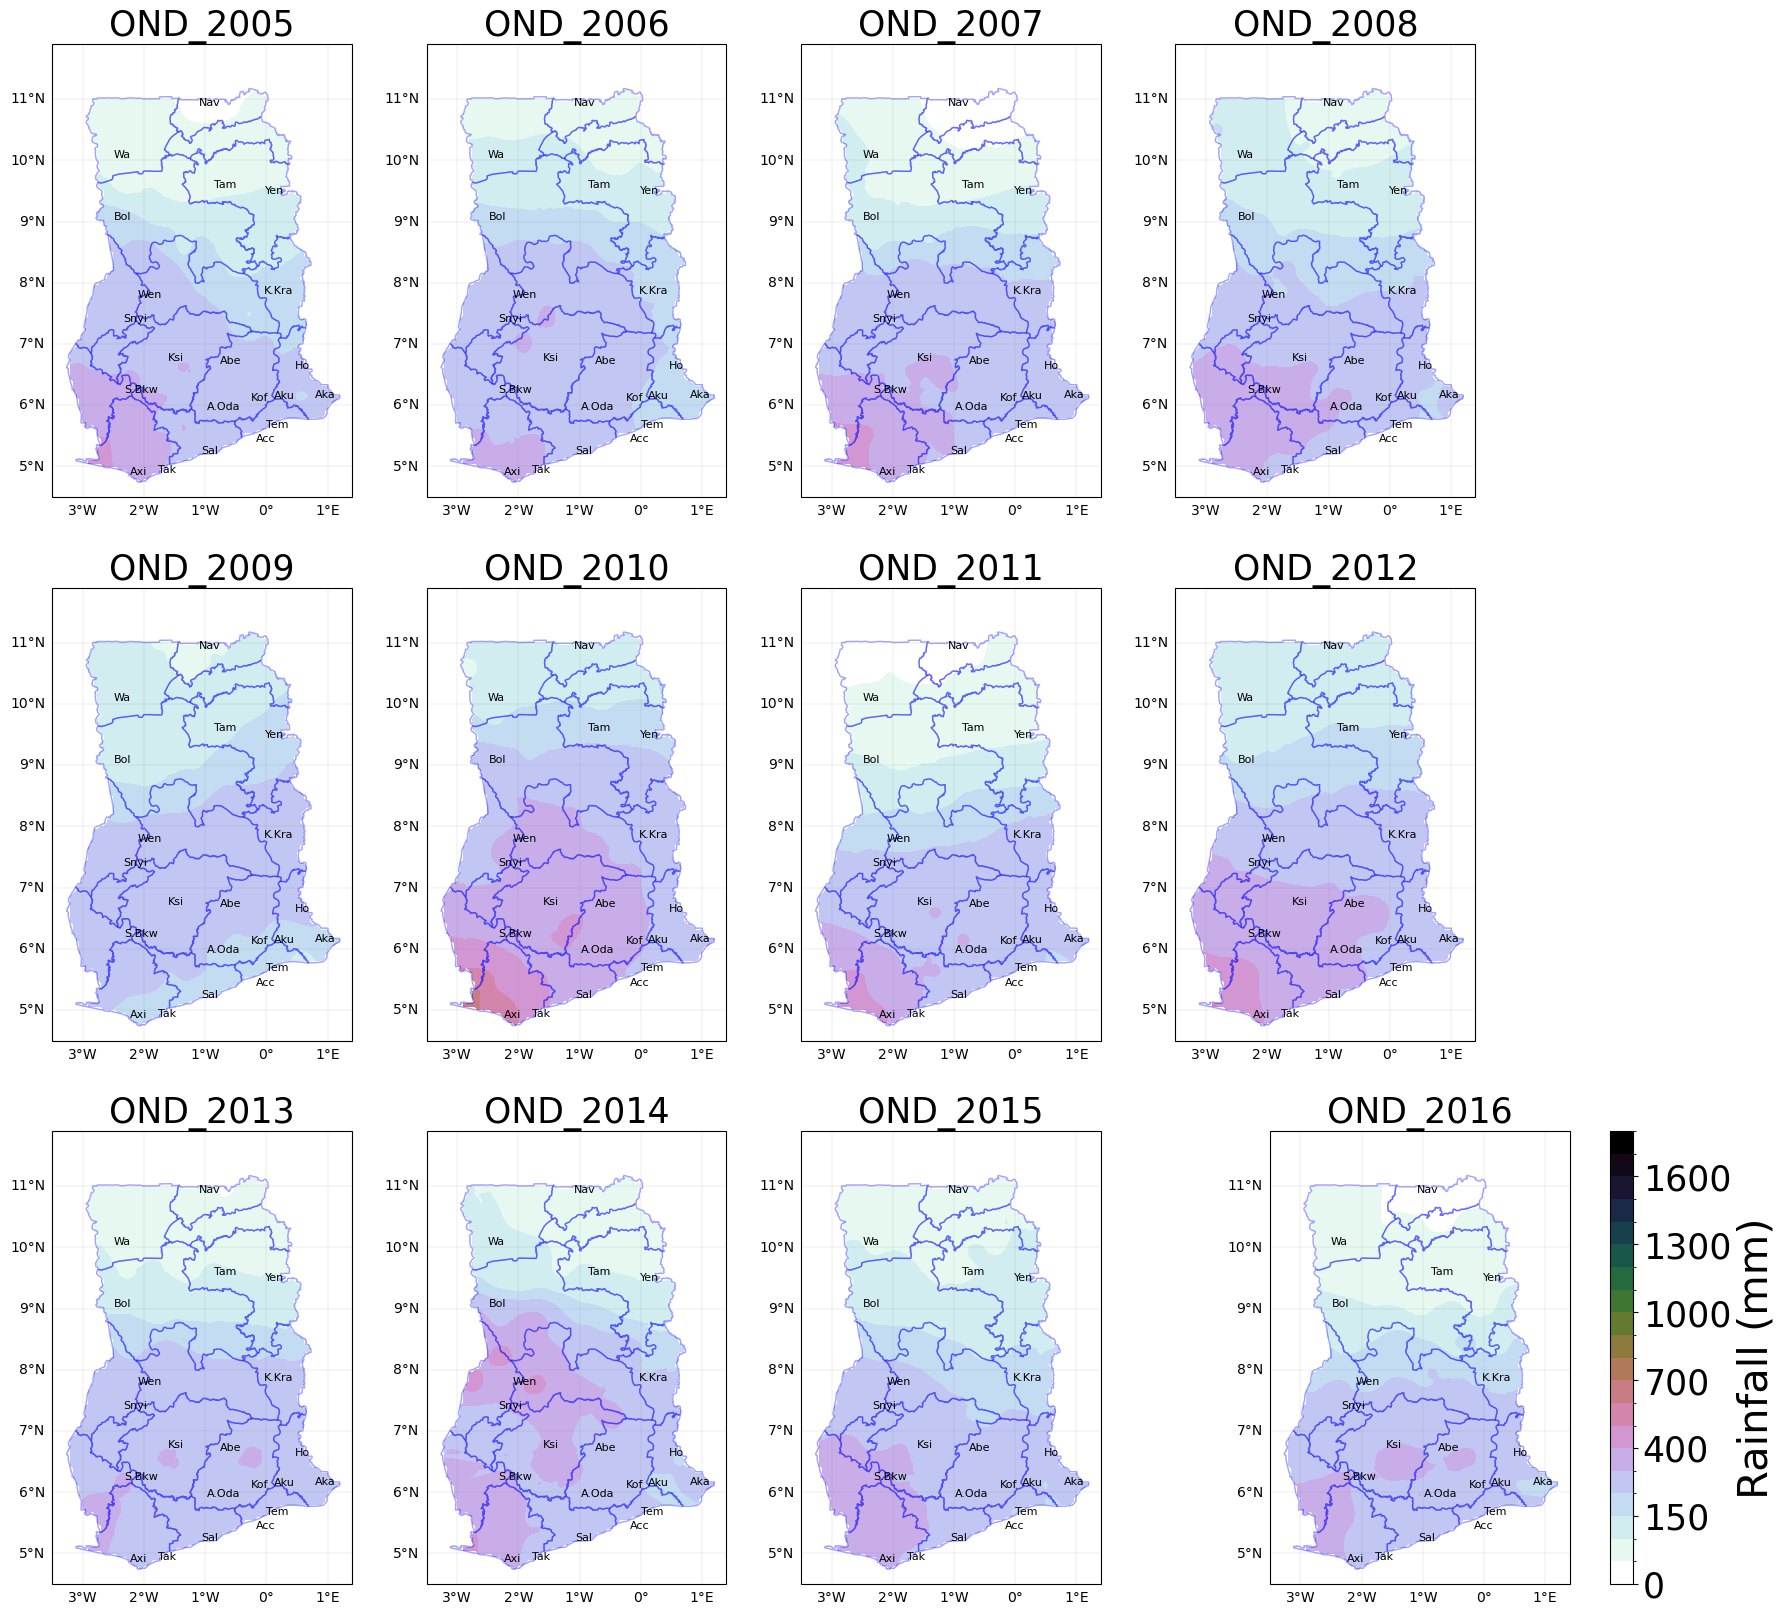

In [182]:
#Add shapefile and maake a panel plots
shp_path = "C:\\Users\\JAMES\\Desktop\\GMet\\Flood\\GHA_new\\gha_admbnda_adm1_gss_20210308.shp"

plt.figure(figsize=(25, 20)) 
ax = plt.subplot( 3,4,1,projection=ccrs.PlateCarree())

n=0

for tem in range((len(cdtfiles))):
    v=vrble[tem]
    n += 1
    ax = plt.subplot(3,4, n, projection=ccrs.PlateCarree())
    adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries())
    
    d=cdtfiles[tem]['var']

    #cmap color names: cubehelix,CMRmap
    r = cdtfiles[tem]['var'].plot.contourf(cmap = 'cubehelix_r',transform=ccrs.PlateCarree(),
                                           levels=[0,50,100,150,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800],
                                          add_colorbar=False,cbar_ax=None)                                          
   
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor="blue", facecolor="none", alpha=0.2)
    gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='gray')
    gl.top_labels = False  ###Changing these to true or false will add or remove the lon/lat labelling 
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    ax.set(title=titles[tem])
    ax.set_title(titles[tem],fontsize=25)      
    ax.set_xlim(-3.5,1.4)
    ax.set_ylim(4.5,11.9)
    #ax.set_aspect('equal')
    
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor="blue", facecolor="none", alpha=0.2)
    ax.plot(-0.17, 5.6, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.17, 5.4, 'Acc', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.2333, 4.8667,color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.2333, 4.8667, 'Axi', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-1.07, 5.2, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-1.07, 5.2, 'Sal', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-1.7747, 4.8935, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-1.7747, 4.8935, 'Tak', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(0.0017, 5.6334, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(0.0020, 5.6334, 'Tem', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(0.8, 6.12, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(0.8, 6.12, 'Aka', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(0.1167, 6.1,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(0.1167, 6.1, 'Aku', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.9784, 5.9293,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.9784, 5.9293, 'A.Oda', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.25, 6.08, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.25, 6.08, 'Kof', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.75, 6.68,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.75, 6.68, 'Abe', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.3211, 6.1965, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.3211, 6.1965, 'S.Bkw', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-1.6, 6.72,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(-1.6, 6.72, 'Ksi', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.3299, 7.3592, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.3299, 7.3592, 'Snyi', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(0.4667, 6.6,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(0.4667, 6.6, 'Ho', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.1, 7.75,  color='black',markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.1, 7.75, 'Wen', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.0333, 7.8167, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.0333, 7.8167, 'K.Kra', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.4833, 9.0333, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.4833, 9.0333, 'Bol', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.02, 9.45, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.02, 9.45, 'Yen', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-0.8624, 9.5539, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-0.8624, 9.5539, 'Tam', color='black', fontsize=8,transform=ccrs.PlateCarree())

    ax.plot(-2.5, 10.05,  color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-2.5, 10.05, 'Wa', color='black', fontsize=8,transform=ccrs.PlateCarree())


    ax.plot(-1.1,10.9, color='black', markersize=4, transform=ccrs.PlateCarree())
    ax.text(-1.1,10.9, 'Nav', color='black', fontsize=8,transform=ccrs.PlateCarree())

# sub_ax= plt.axes([0.9,0.5,0.025,0.03])
cbar = plt.colorbar(r, orientation="vertical",shrink=1)#,cax=sub_ax)#,orientation='horizontal')
cbar.ax.tick_params(labelsize=25) 
cbar.ax.set_ylabel("Rainfall (mm)",fontsize=30)

#plt.tight_layout()
plt.subplots_adjust(wspace=-0.54, hspace=0.2)
plt.savefig(fig_path+'OND_2005_2016.jpg')
#plt.colorbar(r, label="Rainfall (mm)", orientation="vertical")